# Chapter 2: Classifying with Real-world Examples

### Classification (type of supervised learning)
- given labeled examples, can we design a rule to be later applied to other examples?

### Classification example 
- Spam email detector trained using spam and ham (non-spam) messages.

### Dataset
- Collection of morpholigical measurments of several Iris flowers.
- 150 instances, 4 features

### Features
- Sepal length
- Sepal width
- Petal length
- Petal width

### Question
- Given these examples, if we see a new flower out in the field, could we make a good prediction about its species from its measurements?

### Visualization as initial exploratory analysis allow:
- learning the general features of the data set.
- catching of problems that occured with data collection early.


data type:  <class 'sklearn.datasets.base.Bunch'>
feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names: ['setosa' 'versicolor' 'virginica']


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


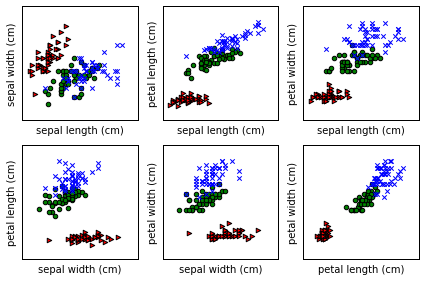

In [64]:
%matplotlib inline

from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

## iris dataset load

data=load_iris()
print("data type: ",type(data))

features=data.data
feature_names=data.feature_names
print("feature names:",feature_names)

target=data.target
target_names=data.target_names
print("target names:",target_names)

## plotting iris data set

fig,axes=plt.subplots(2,3)
pairs=[(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)]
color_markers=[('r','>'),('g','o'),('b','x')]

for i,(p0,p1) in enumerate(pairs):
    ax=axes.flat[i] # creates 1d image
    for t in range(3):
        c,marker=color_markers[t]
        ax.scatter(features[target==t,p0],features[target==t,p1],marker=marker,c=c)
    ax.set_xlabel(feature_names[p0])
    ax.set_ylabel(feature_names[p1])
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
fig.show() # fig.savefig('filename')

We can see that there are two large groups: 
+ Iris Setosa (triangles)
+ Mixture of Iris Versicolor (circles) and Iris Virginica (x marks).

### Classification Model - Simple Threshold Model
Looking at data, petal length seems to be able to separate Iris Setosa from the other two flower species. We can discover the cut-off as:

In [65]:
labels_all=target_names[target]
print("labels_all:",labels_all)

labels_all: ['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 've

In [66]:
petal_length=features[:,2] # petal length is feature at position 2
print("petal_length:",petal_length)

petal_length: [ 1.4  1.4  1.3  1.5  1.4  1.7  1.4  1.5  1.4  1.5  1.5  1.6  1.4  1.1  1.2
  1.5  1.3  1.4  1.7  1.5  1.7  1.5  1.   1.7  1.9  1.6  1.6  1.5  1.4  1.6
  1.6  1.5  1.5  1.4  1.5  1.2  1.3  1.5  1.3  1.5  1.3  1.3  1.3  1.6  1.9
  1.4  1.6  1.4  1.5  1.4  4.7  4.5  4.9  4.   4.6  4.5  4.7  3.3  4.6  3.9
  3.5  4.2  4.   4.7  3.6  4.4  4.5  4.1  4.5  3.9  4.8  4.   4.9  4.7  4.3
  4.4  4.8  5.   4.5  3.5  3.8  3.7  3.9  5.1  4.5  4.5  4.7  4.4  4.1  4.
  4.4  4.6  4.   3.3  4.2  4.2  4.2  4.3  3.   4.1  6.   5.1  5.9  5.6  5.8
  6.6  4.5  6.3  5.8  6.1  5.1  5.3  5.5  5.   5.1  5.3  5.5  6.7  6.9  5.
  5.7  4.9  6.7  4.9  5.7  6.   4.8  4.9  5.6  5.8  6.1  6.4  5.6  5.1  5.6
  6.1  5.6  5.5  4.8  5.4  5.6  5.1  5.1  5.9  5.7  5.2  5.   5.2  5.4  5.1]


In [67]:
is_setosa=(labels_all=="setosa")
print("is_setosa:",is_setosa)

is_setosa: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]


In [68]:
max_setosa=petal_length[is_setosa].max()
print("Maximum of setosa: {0}".format(max_setosa))
min_non_setosa=petal_length[~is_setosa].min()
print("Minimum of non-setosa: {0}".format(min_non_setosa))

Maximum of setosa: 1.9
Minimum of non-setosa: 3.0


So, this can be our **simple threshold model**: *if the petal length is smaller than 2, then this is an Iris Setosa flower; otherwise it is either Iris Virginica or Iris Versicolor.*

In this case, we did not actually do any machine learning. Instead, we looked at the data ourselves, looking for a separation between the classes. Machine learning happens when we write code to look for this separation automatically.

we cannot immediately see what the best threshold is for distinguishing Iris Virginica from Iris Versicolor. We can even see that we will never achieve perfect separation with these features. We could, however, look for the best possible separation, the separation that makes the fewest mistakes.



In [69]:
features_non_setosa=features[~is_setosa]
print("features_non_setosa:",features_non_setosa)

features_non_setosa: [[ 7.   3.2  4.7  1.4]
 [ 6.4  3.2  4.5  1.5]
 [ 6.9  3.1  4.9  1.5]
 [ 5.5  2.3  4.   1.3]
 [ 6.5  2.8  4.6  1.5]
 [ 5.7  2.8  4.5  1.3]
 [ 6.3  3.3  4.7  1.6]
 [ 4.9  2.4  3.3  1. ]
 [ 6.6  2.9  4.6  1.3]
 [ 5.2  2.7  3.9  1.4]
 [ 5.   2.   3.5  1. ]
 [ 5.9  3.   4.2  1.5]
 [ 6.   2.2  4.   1. ]
 [ 6.1  2.9  4.7  1.4]
 [ 5.6  2.9  3.6  1.3]
 [ 6.7  3.1  4.4  1.4]
 [ 5.6  3.   4.5  1.5]
 [ 5.8  2.7  4.1  1. ]
 [ 6.2  2.2  4.5  1.5]
 [ 5.6  2.5  3.9  1.1]
 [ 5.9  3.2  4.8  1.8]
 [ 6.1  2.8  4.   1.3]
 [ 6.3  2.5  4.9  1.5]
 [ 6.1  2.8  4.7  1.2]
 [ 6.4  2.9  4.3  1.3]
 [ 6.6  3.   4.4  1.4]
 [ 6.8  2.8  4.8  1.4]
 [ 6.7  3.   5.   1.7]
 [ 6.   2.9  4.5  1.5]
 [ 5.7  2.6  3.5  1. ]
 [ 5.5  2.4  3.8  1.1]
 [ 5.5  2.4  3.7  1. ]
 [ 5.8  2.7  3.9  1.2]
 [ 6.   2.7  5.1  1.6]
 [ 5.4  3.   4.5  1.5]
 [ 6.   3.4  4.5  1.6]
 [ 6.7  3.1  4.7  1.5]
 [ 6.3  2.3  4.4  1.3]
 [ 5.6  3.   4.1  1.3]
 [ 5.5  2.5  4.   1.3]
 [ 5.5  2.6  4.4  1.2]
 [ 6.1  3.   4.6  1.4]
 [ 5.8  2.6  

In [70]:
labels_non_setosa=labels_all[~is_setosa]
print("labels_non_setosa:",labels_non_setosa)

labels_non_setosa: ['versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'vir

In [71]:
is_virginica=(labels_non_setosa=='virginica')
print("is_virginica:",is_virginica)
is_versicolor=(labels_non_setosa=='versicolor')
print("is_versicolor:",is_versicolor)

is_virginica: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
is_versicolor: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False Fa

We run a loop over all possible features and thresholds to see which one results in better accuracy. Accuracy is simply the fraction of examples that the model classifies correctly.

We need to test two types of thresholds for each feature and value: we test a greater than threshold and the reverse comparison.

The little trick of computing the mean of the comparisons gives us the fraction of correct results, the accuracy.

At the end of the for loop, all the possible thresholds for all the possible features have been tested, and the variables best_fi, best_t, and best_reverse hold our model.

In [72]:
import numpy as np

def fit_model(features, labels):
    '''Learn a simple threshold model'''
    best_acc = -1.0
    # Loop over all the features:
    for fi in range(features.shape[1]):
        thresh = features[:, fi].copy()
        # test all feature values in order:
        thresh.sort()
        for t in thresh:
            pred = (features[:, fi] > t)

            # Measure the accuracy of this 
            acc = (pred == labels).mean()

            rev_acc = (pred == ~labels).mean()
            if rev_acc > acc:
                acc = rev_acc
                reverse = True
            else:
                reverse = False
            if acc > best_acc:
                best_acc = acc
                best_fi = fi
                best_t = t
                best_reverse = reverse

    print('Best threshold is {0} on feature {1} (index {2}),which achieves accuracy of {3:.2%}.'\
          .format(best_t, data.feature_names[best_fi], best_fi, best_acc))
    
    # A model is a threshold and an index
    return best_t, best_fi, best_reverse

def predict(model, features):
    '''Apply a learned model'''
    # A model is a pair as returned by fit_model
    t, fi, reverse = model
    if reverse:
        return features[:, fi] <= t
    else:
        return features[:, fi] > t

def accuracy(features, labels, model):
    '''Compute the accuracy of the model'''
    preds = predict(model, features)
    acc = np.mean(preds == labels)
    print("Accuracy is {:.2%}".format(acc))
    return acc

In [73]:
model=fit_model(features_non_setosa,is_virginica)
acc=accuracy(features_non_setosa,is_virginica,model)

Best threshold is 1.6 on feature petal width (cm) (index 3),which achieves accuracy of 94.00%.
Accuracy is 94.00%


In [74]:
model=fit_model(features_non_setosa,is_versicolor)
acc=accuracy(features_non_setosa,is_versicolor,model)

Best threshold is 1.6 on feature petal width (cm) (index 3),which achieves accuracy of 94.00%.
Accuracy is 94.00%
